In [ ]:
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)


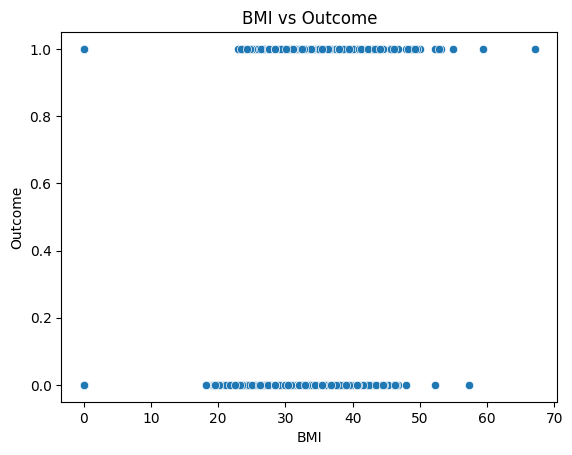

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for BMI vs Outcome
sns.scatterplot(x='BMI', y='Outcome', data=data)
plt.title('BMI vs Outcome')
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
X = data[['BMI']]  # Independent variable
y = data['Outcome']  # Dependent variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[133  18]
 [ 62  18]]
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       151
           1       0.50      0.23      0.31        80

    accuracy                           0.65       231
   macro avg       0.59      0.55      0.54       231
weighted avg       0.62      0.65      0.61       231



In [ ]:
import statsmodels.api as sm

# Add constant to the model (intercept)
X = sm.add_constant(data[['BMI']])
y = data['Outcome']

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.599423
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                 0.07325
Time:                        06:19:09   Log-Likelihood:                -460.36
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.457e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6864      0.409     -9.014      0.000      -4.488      -2.885
BMI            0.0935      0.